# 1. Import Packages and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.legend_handler import HandlerLine2D
from scipy import stats
from sklearn import preprocessing, svm, tree
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from statsmodels.graphics.mosaicplot import mosaic

pd.options.display.max_columns = None

In [ ]:
# Read in necessary files

# Mushroom data
mushroom = pd.read_csv('./Mushroom Data/mushroom_train.csv')

mushroom


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,NaN,y,w,NaN,NaN,t,p,NaN,d,u


# 2. Understanding our Data

In [ ]:
# See summary statistics

summary_stats = mushroom.describe()
print(summary_stats)

                 id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00
min    0.000000e+00  3.000000e-02  0.000000e+00  0.000000e+00
25%    7.792360e+05  3.320000e+00  4.670000e+00  4.970000e+00
50%    1.558472e+06  5.750000e+00  5.880000e+00  9.650000e+00
75%    2.337708e+06  8.240000e+00  7.410000e+00  1.563000e+01
max    3.116944e+06  8.067000e+01  8.872000e+01  1.029000e+02


In [ ]:
print("Column names and data type of each column:")
mushroom.dtypes

Column names and data type of each column:


id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [ ]:
print("There are {} duplicates in the dataset.".format(mushroom.duplicated().sum()))

There are 0 duplicates in the dataset.


In [ ]:
cat_cols = mushroom.select_dtypes(include='object').columns
cat_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color',
       'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')

In [ ]:
# Display only columns with missing data
missing_data = mushroom.isnull().sum()

print(missing_data)


id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


In [ ]:
# Calculate the percentage of missing values for each categorical column
missing_percentage = mushroom[cat_cols].isnull().sum() / mushroom.shape[0] * 100

# Sort the missing percentages in descending order
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Display the result
print(missing_percentage_sorted)


veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0.001444
cap-shape                0.001283
stem-color               0.001219
has-ring                 0.000770
cap-color                0.000385
does-bruise-or-bleed     0.000257
class                    0.000000
season                   0.000000
dtype: float64


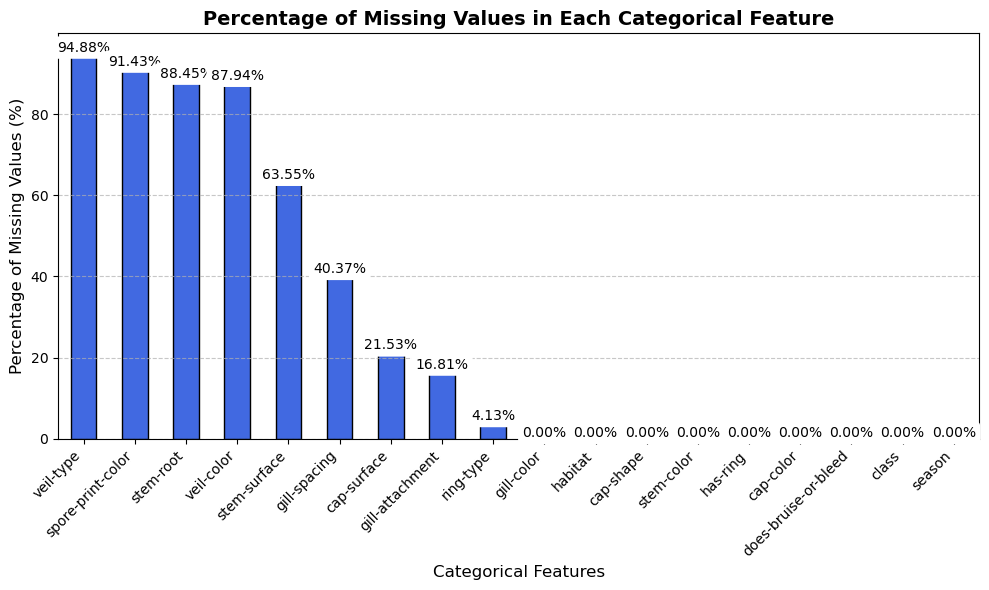

In [ ]:
# Plotting the bar plot with new color and improved design
plt.figure(figsize=(10, 6))
ax = missing_percentage.sort_values(ascending=False).plot(kind='bar', color='royalblue', edgecolor='black')

# Annotating each bar with the percentage of missing values
for index, value in enumerate(missing_percentage.sort_values(ascending=False)):
    ax.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, color='black',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Adding grid, titles, and labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Percentage of Missing Values in Each Categorical Feature', fontsize=14, fontweight='bold')
plt.xlabel('Categorical Features', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(missing_percentage) + 5)  # Adjust ylim for better visualization of text
plt.tight_layout()  # Adjusts to ensure everything fits without overlap

plt.show()


# 3. Data Cleaning

In [ ]:
# Drop 'id' column
mushroom = mushroom.drop(['id'], axis=1)

### Skewness of numerical data

In [ ]:
# Separate numerical columns
num_cols = mushroom.select_dtypes(include=['number']).columns

print("The skewness of columns:")
print(mushroom[num_cols].skew())

The skewness of columns:
cap-diameter    3.972609
stem-height     1.926682
stem-width      1.235427
dtype: float64


### Dealing with Missing Values

In [ ]:
# Identify columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > 80].index

# Drop those columns from the DataFrame
mushroom = mushroom.drop(columns=columns_to_drop)

# Select categorical columns, excluding the 'class' column and columns with more than 80% of missing values
reduced_cat_cols = mushroom.select_dtypes(include='object').drop(['class'], axis=1).columns

### Dealing with Infrequent Data

In [ ]:
for col in reduced_cat_cols:
    num_unique = mushroom[col].nunique()
    print(f"'{col}' has {num_unique} unique categories.")

'cap-shape' has 74 unique categories.
'cap-surface' has 83 unique categories.
'cap-color' has 78 unique categories.
'does-bruise-or-bleed' has 26 unique categories.
'gill-attachment' has 78 unique categories.
'gill-spacing' has 48 unique categories.
'gill-color' has 63 unique categories.
'stem-surface' has 60 unique categories.
'stem-color' has 59 unique categories.
'has-ring' has 23 unique categories.
'ring-type' has 40 unique categories.
'habitat' has 52 unique categories.
'season' has 4 unique categories.


In [ ]:
for col in reduced_cat_cols:
    unique_values = mushroom[col].unique()
    print(f'{col}: {unique_values}')

cap-shape: ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']
cap-surface: ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '4.93' 'spore-print-color' 'spore-color' '2.92'
 '2.51' '7.99' 

In [ ]:
# Define a function to identify and replace infrequent categories
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

# Handle invalid values and infrequent categories for all categorical columns
for col in reduced_cat_cols:
    mushroom = replace_infrequent_categories(mushroom, col)

# Print out number of unique columns after a replacement
print("After a replacement:")
for col in reduced_cat_cols:
    num_unique = mushroom[col].nunique()
    print(f"'{col}' has {num_unique} unique categories.")

After a replacement:
'cap-shape' has 8 unique categories.
'cap-surface' has 14 unique categories.
'cap-color' has 13 unique categories.
'does-bruise-or-bleed' has 3 unique categories.
'gill-attachment' has 9 unique categories.
'gill-spacing' has 4 unique categories.
'gill-color' has 13 unique categories.
'stem-surface' has 9 unique categories.
'stem-color' has 14 unique categories.
'has-ring' has 3 unique categories.
'ring-type' has 10 unique categories.
'habitat' has 9 unique categories.
'season' has 4 unique categories.


In [ ]:
# Checking unique values again
for col in reduced_cat_cols:
    unique_values = mushroom[col].unique()
    print(f'{col}: {unique_values}')

cap-shape: ['f' 'x' 'p' 'b' 'o' 'c' 's' 'Unknown' nan]
cap-surface: ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' 'Unknown' 'f' 'n']
cap-color: ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'Unknown' nan]
does-bruise-or-bleed: ['f' 't' 'Unknown' nan]
gill-attachment: ['a' 'x' 's' 'd' 'e' nan 'f' 'p' 'Unknown' 'c']
gill-spacing: ['c' nan 'd' 'f' 'Unknown']
gill-color: ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'Unknown' nan]
stem-surface: [nan 'y' 's' 't' 'g' 'h' 'k' 'i' 'f' 'Unknown']
stem-color: ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'f' 'g' 'r' 'k' 'l' 'b' 'Unknown' nan]
has-ring: ['f' 't' 'Unknown' nan]
ring-type: ['f' 'z' 'e' nan 'p' 'l' 'g' 'r' 'm' 'Unknown' 't']
habitat: ['d' 'l' 'g' 'h' 'p' 'm' 'u' 'w' 'Unknown' nan]
season: ['a' 'w' 'u' 's']


### Imputing median into numerical features and mode into categorical features

In [ ]:
# Impute missing values for numerical columns with the median
for col in num_cols:
    median_value = mushroom[col].median()
    mushroom[col] = mushroom[col].fillna(median_value)

# Impute missing values for categorical columns with the mode
for col in reduced_cat_cols:
    mode_value = mushroom[col].mode()[0]  # Mode returns a Series, take the first value
    mushroom[col] = mushroom[col].fillna(mode_value)

# Check if missing values are handled
print(mushroom.isnull().sum())

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64


### Find and drop duplicates

In [ ]:
print("There are {} duplicates in mushroom dataset.".format(mushroom.duplicated().sum()))

There are 237 duplicates in mushroom dataset.


In [ ]:
mushroom = mushroom.drop_duplicates()

# Exploratory Data Analysis

### Distribution of Categorical Features

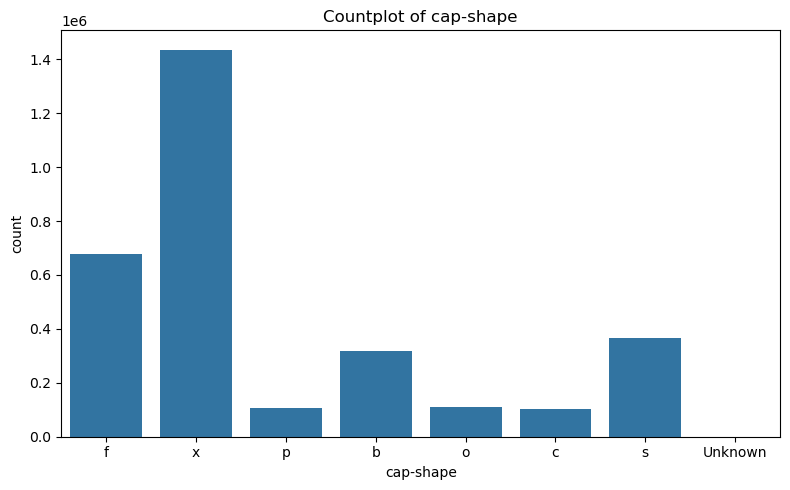

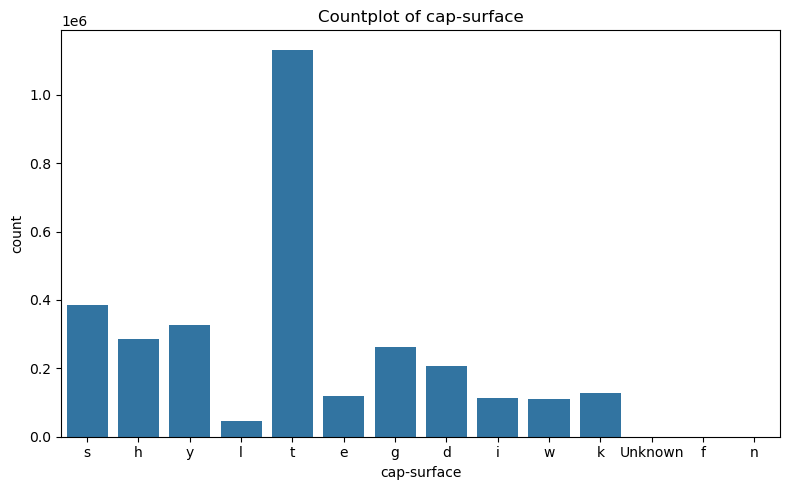

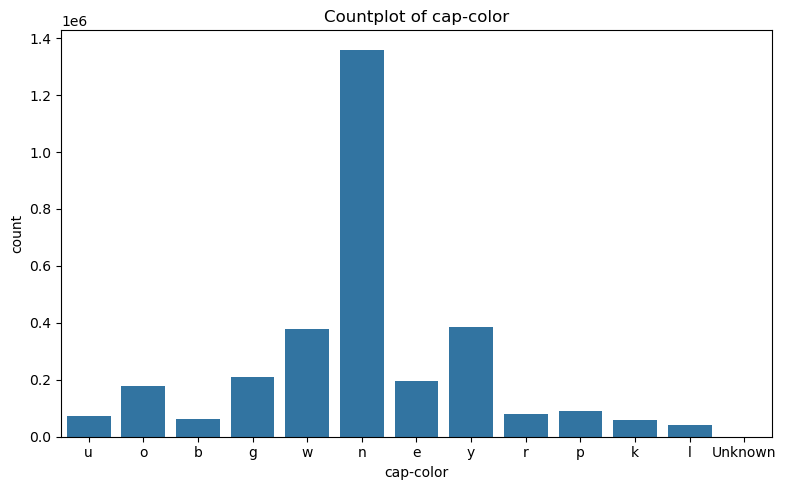

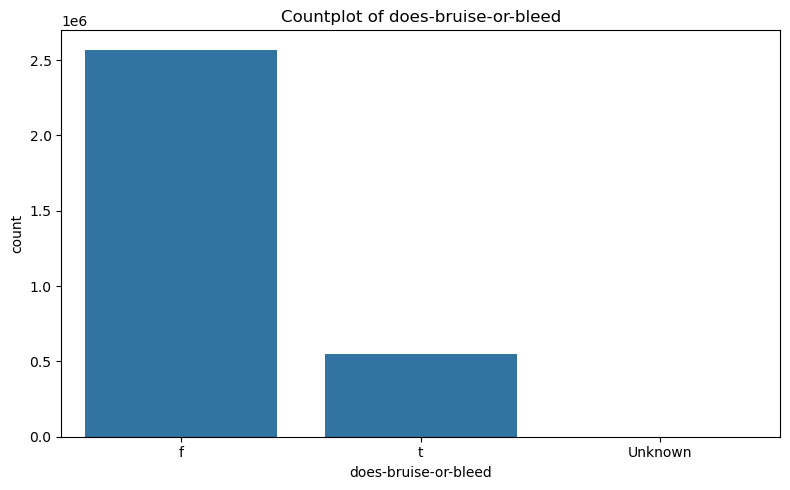

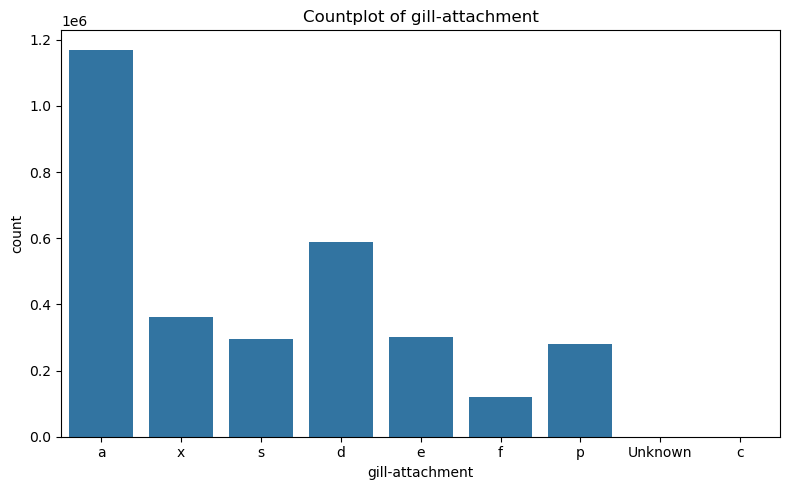

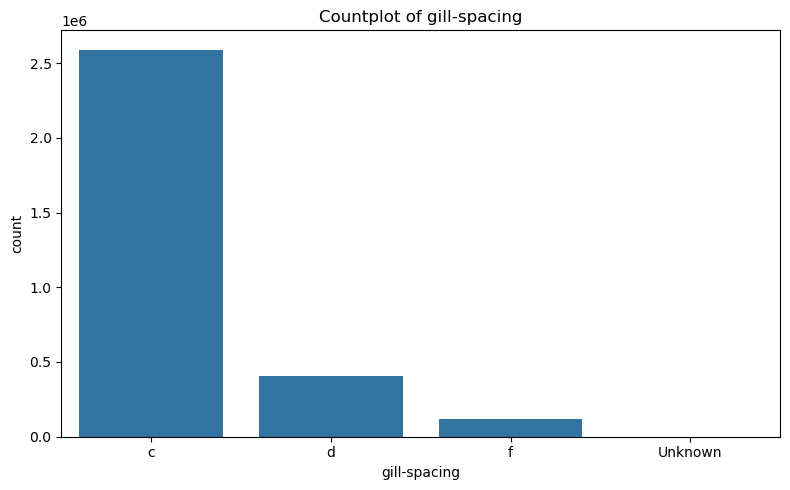

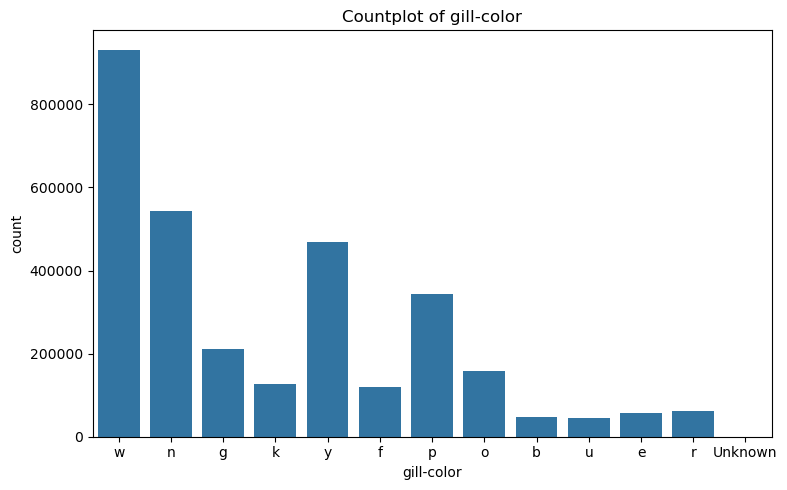

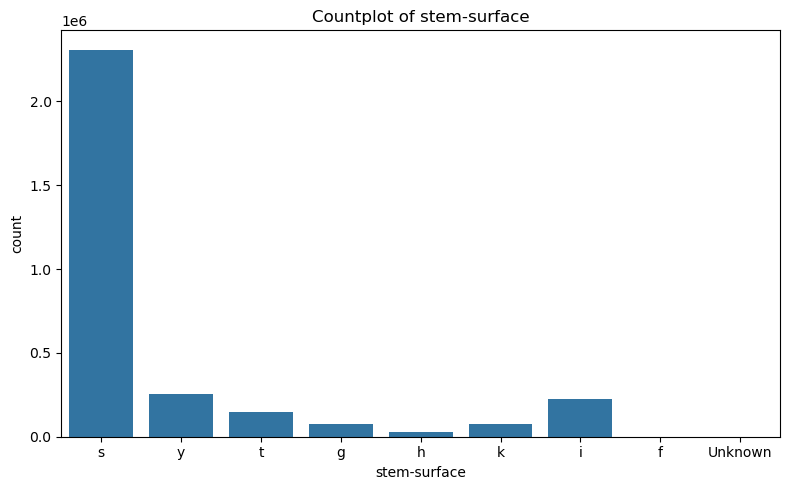

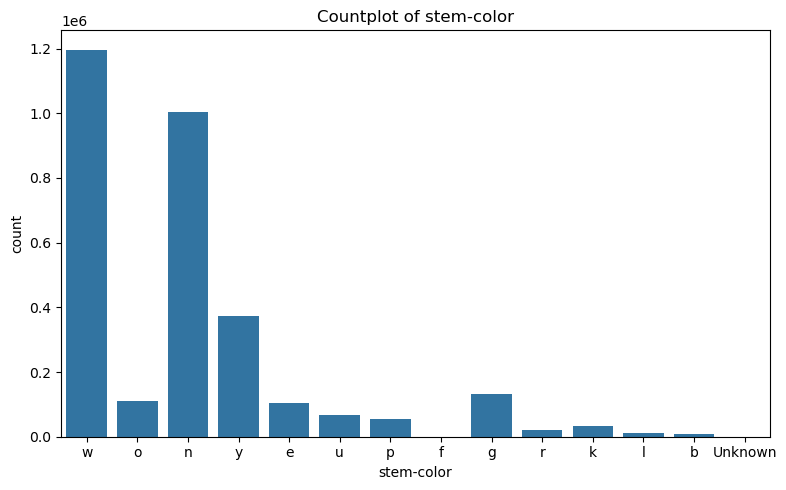

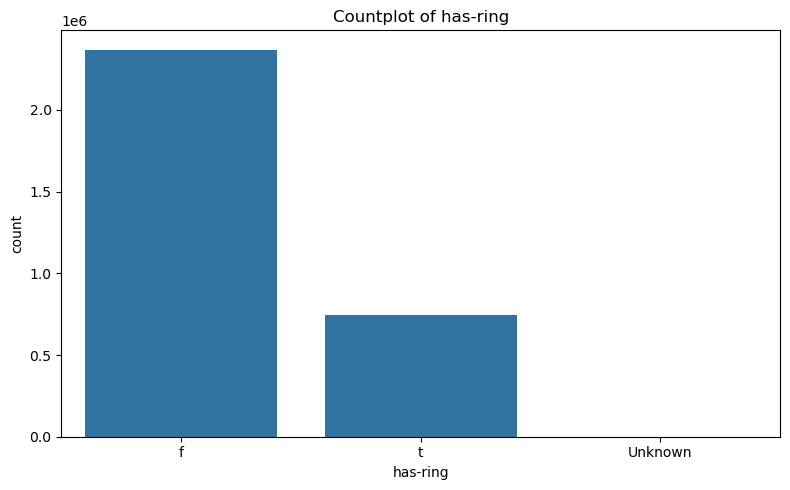

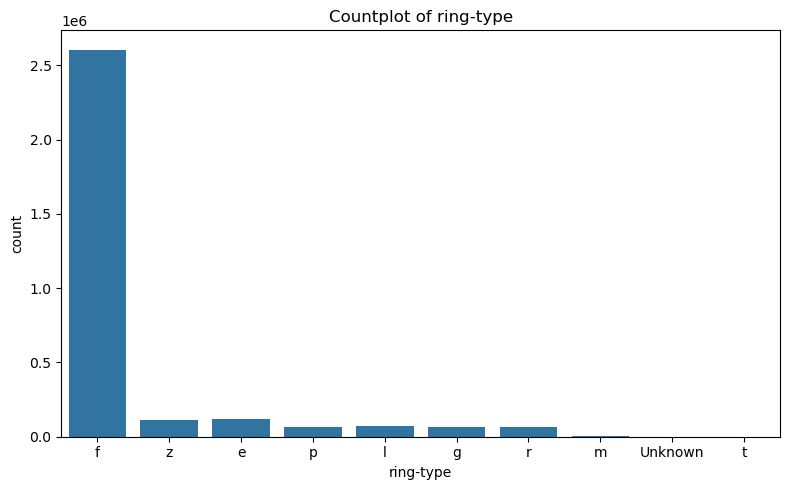

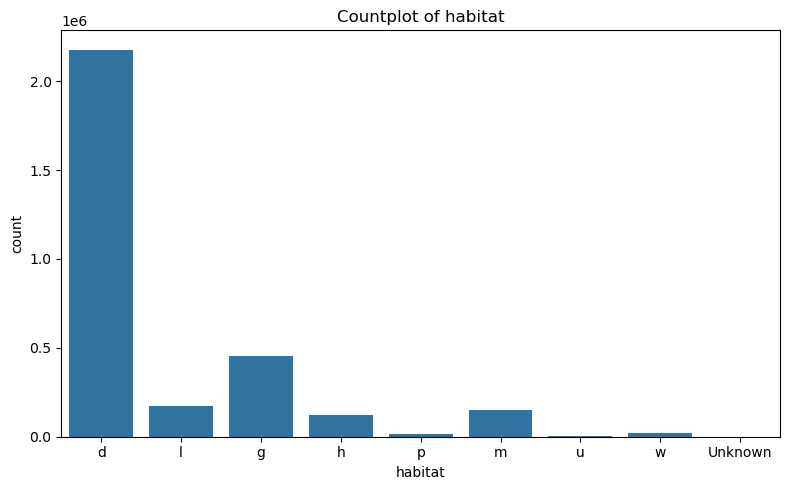

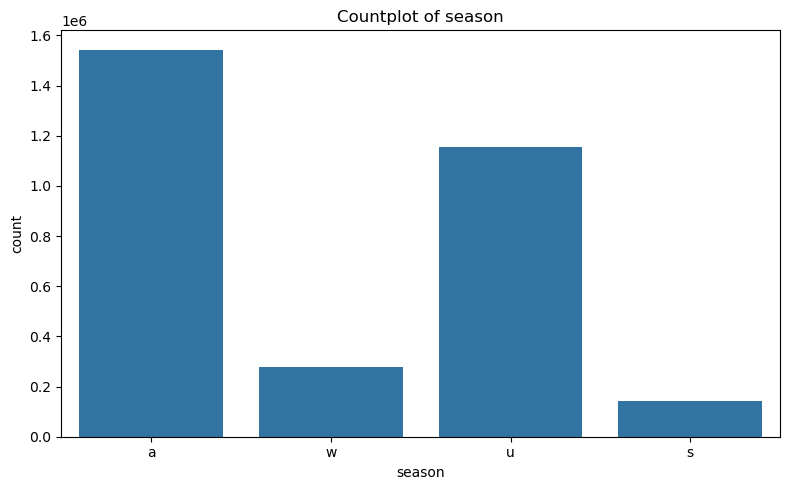

In [ ]:
# Plot countplots for each categorical column
for column in reduced_cat_cols:

    plt.figure(figsize=(8, 5))
    sns.countplot(data=mushroom, x=column)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

### Correlations between Numerical Features

#### The following code might take long to execute ~15 mins

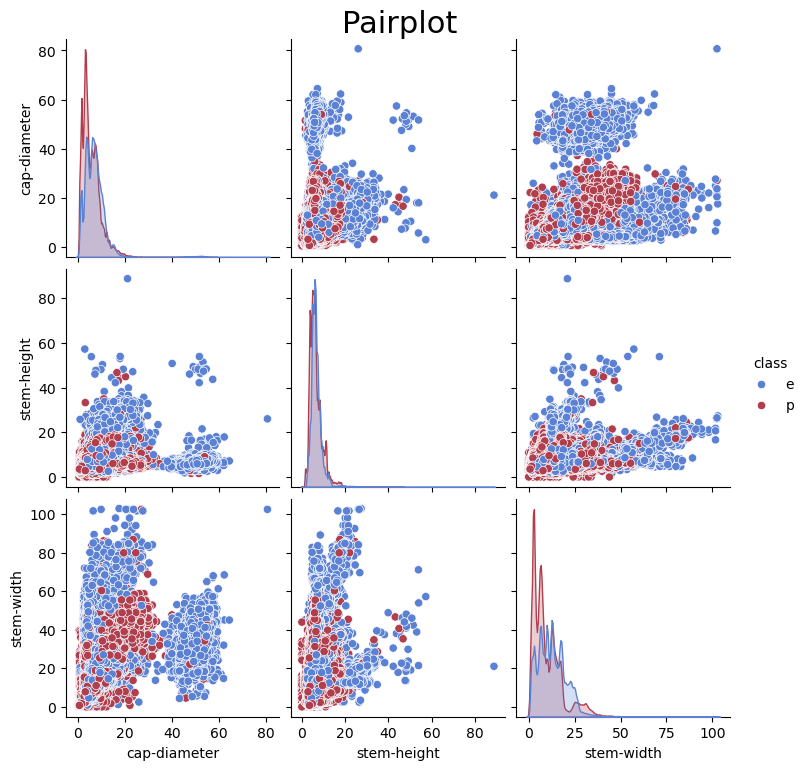

In [ ]:
custom_palette = sns.color_palette(["#5b81d4", "#b03e4d"])

pairplot = sns.pairplot(mushroom, hue='class', palette=custom_palette)
pairplot.figure.suptitle('Pairplot', fontsize=22, y=1.02)
plt.show()

### Exploring Outliers

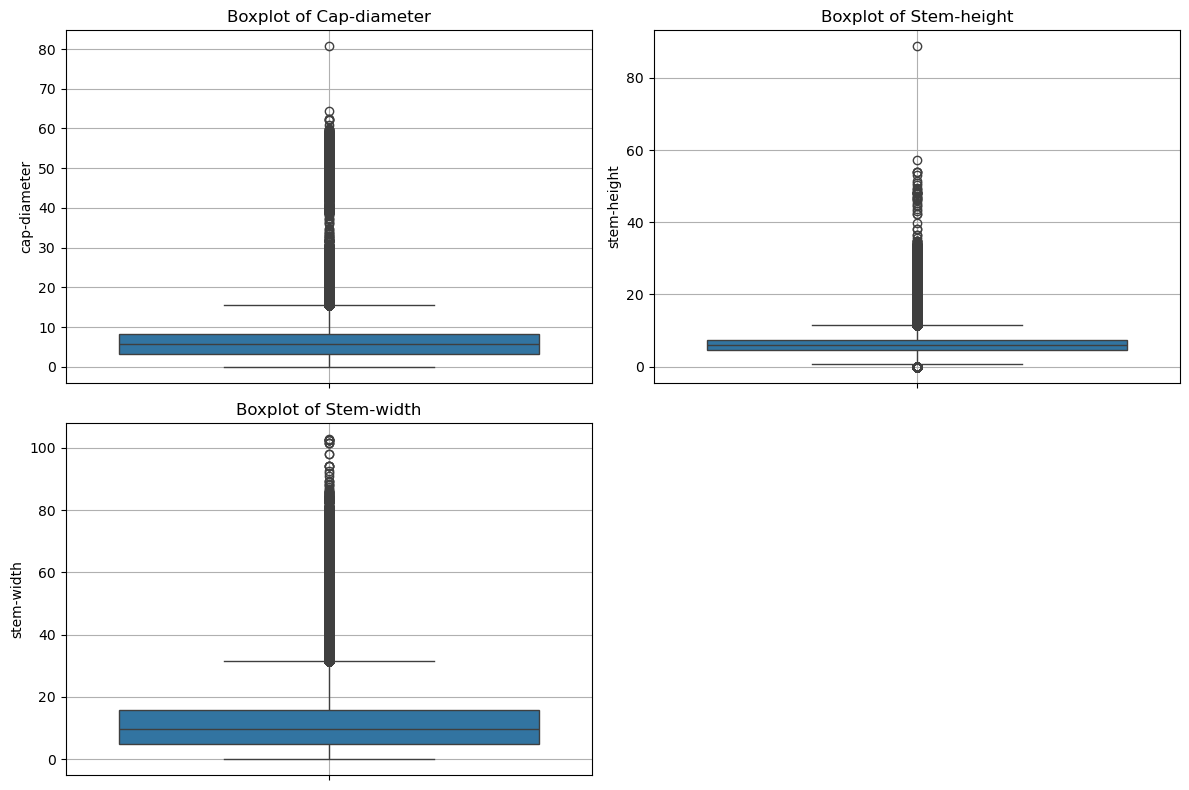

In [ ]:
# Set up the plotting area for the boxplots
plt.figure(figsize=(12, 8))

# Create a boxplot for each numerical column
for i, column in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for the boxplots
    sns.boxplot(data=mushroom, y=column)
    plt.title(f"Boxplot of {column.capitalize()}")
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(mushroom[num_cols])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,cap-diameter,stem-height,stem-width
count,3116708.000,3116708.000,3116708.000
mean,-0.000,0.000,-0.000
std,1.000,1.000,1.000
min,-1.348,-2.351,-1.378
25%,-0.642,-0.622,-0.764
50%,-0.120,-0.173,-0.186
75%,0.414,0.393,0.553
max,15.964,30.511,11.333


In [ ]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.01)
    Q3 = data[col].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Detect and drop outliers
for col in num_cols:
    outliers = detect_outliers_iqr(mushroom, col)
    print(f"Number of outliers in {col}: {outliers.shape[0]}")
    mushroom = mushroom[~mushroom.index.isin(outliers.index)]

def cap_outliers(data, col):
    Q1 = data[col].quantile(0.01)
    Q3 = data[col].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

for column in num_cols:
    cap_outliers(mushroom, col)


Number of outliers in cap-diameter: 11358
Number of outliers in stem-height: 20
Number of outliers in stem-width: 38


### Correlations between Categorical Features

<Figure size 800x600 with 0 Axes>

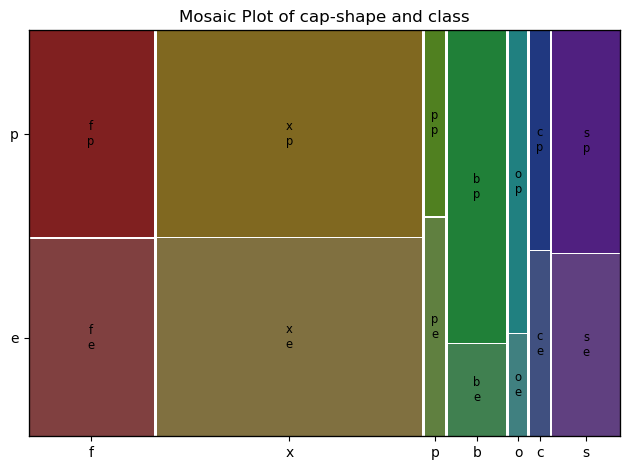

<Figure size 800x600 with 0 Axes>

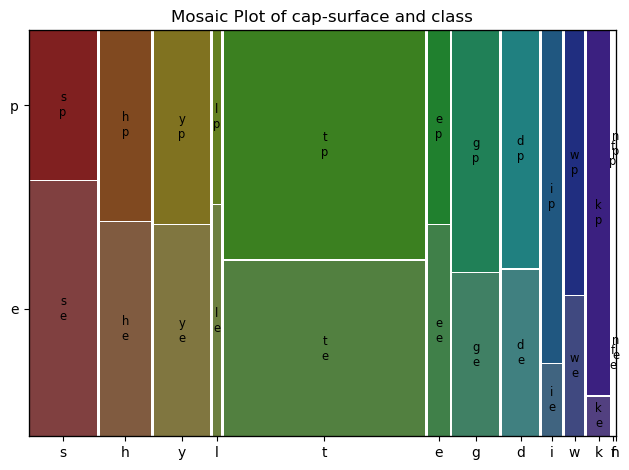

<Figure size 800x600 with 0 Axes>

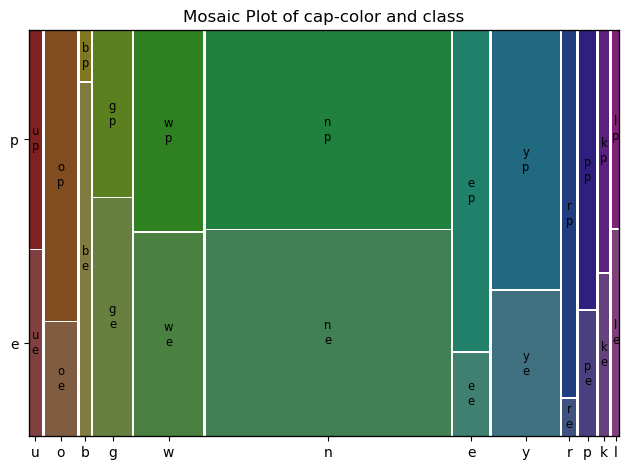

<Figure size 800x600 with 0 Axes>

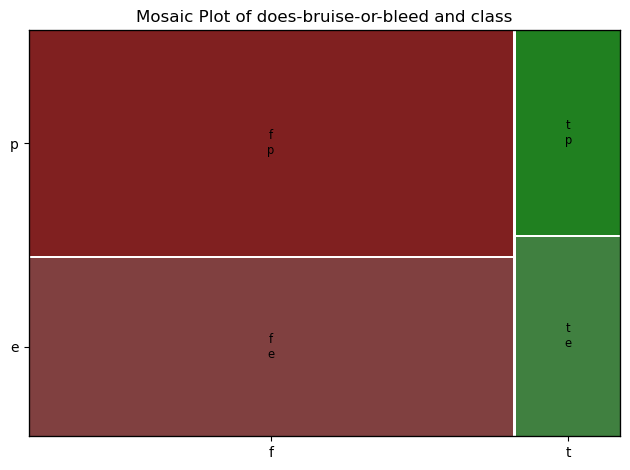

<Figure size 800x600 with 0 Axes>

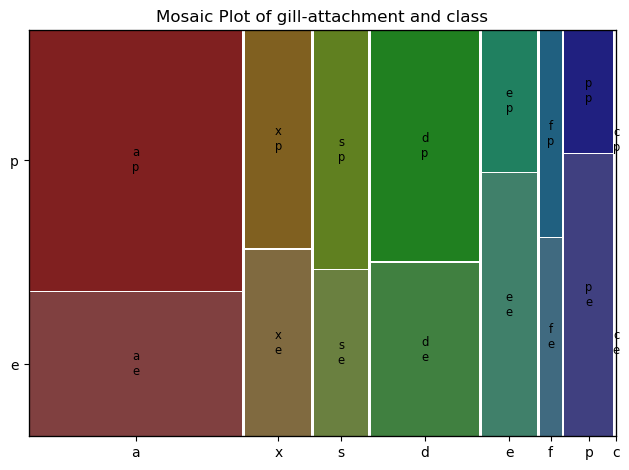

<Figure size 800x600 with 0 Axes>

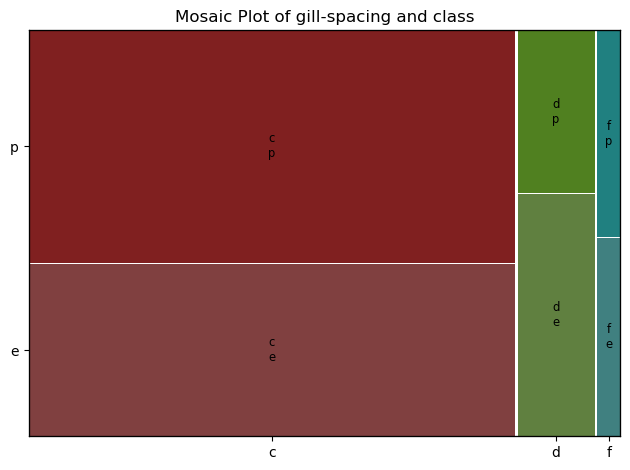

<Figure size 800x600 with 0 Axes>

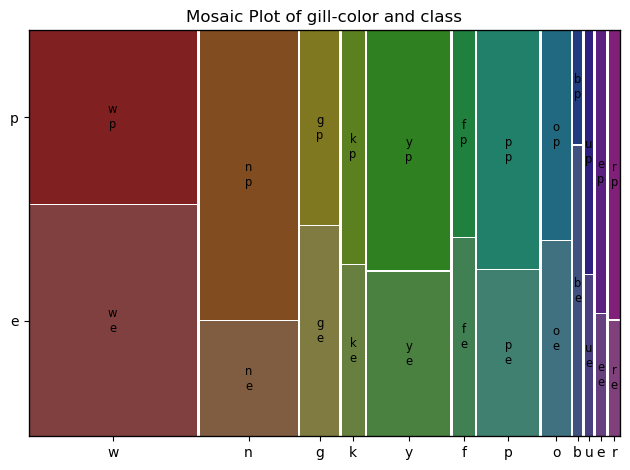

<Figure size 800x600 with 0 Axes>

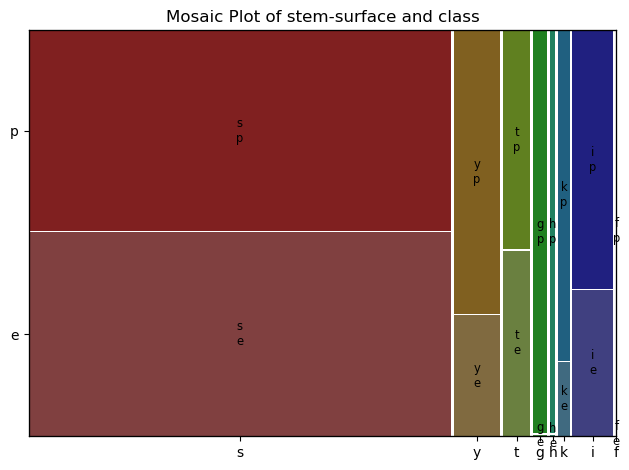

<Figure size 800x600 with 0 Axes>

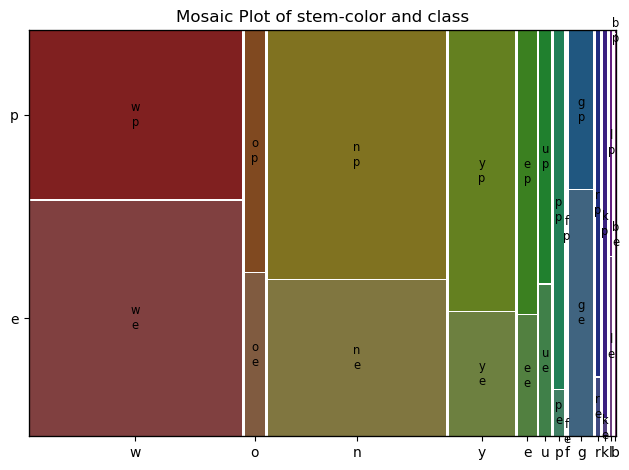

<Figure size 800x600 with 0 Axes>

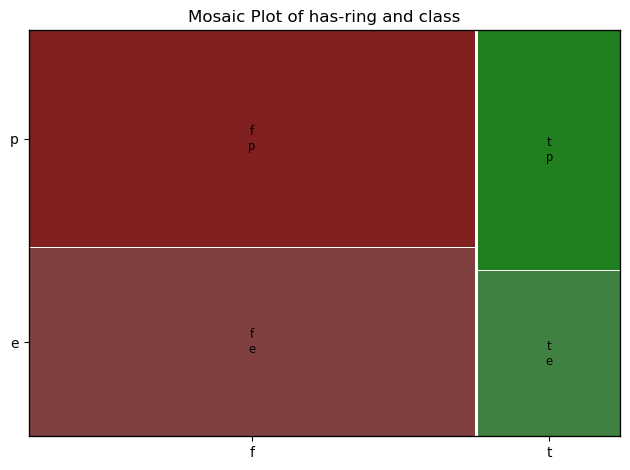

<Figure size 800x600 with 0 Axes>

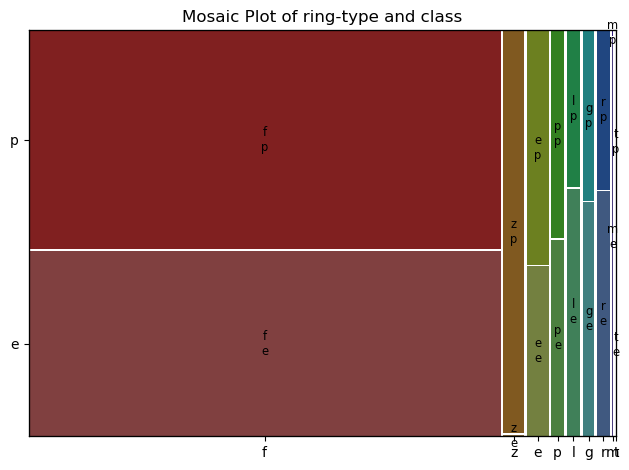

<Figure size 800x600 with 0 Axes>

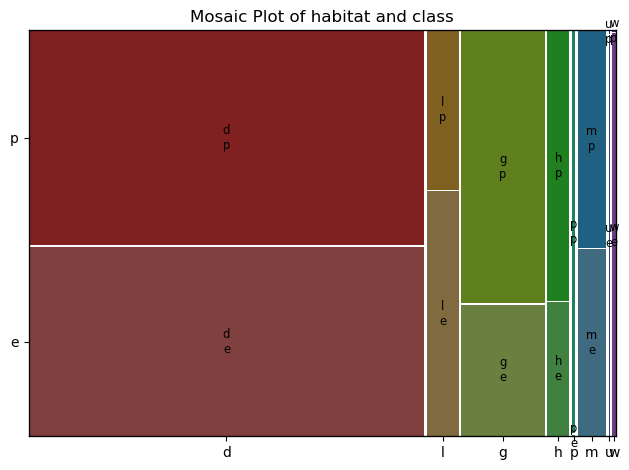

<Figure size 800x600 with 0 Axes>

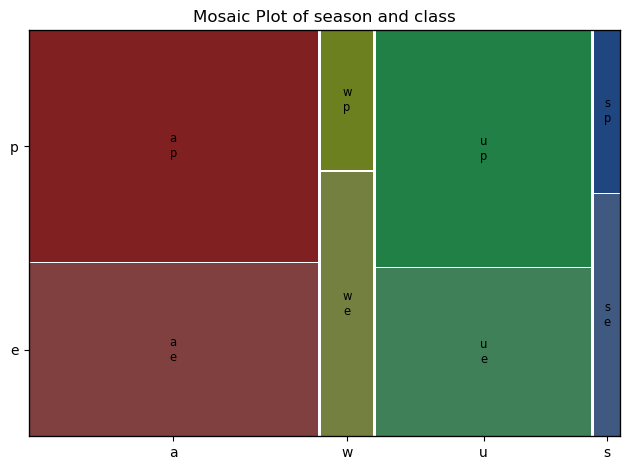

In [ ]:
# Plot mosaic plots for each categorical column, excluding "Unknown" values

for col in reduced_cat_cols:
    # Exclude "Unknown" values from the DataFrame
    filtered_data = mushroom.loc[mushroom[col] != 'Unknown']

    plt.figure(figsize=(8, 6))
    mosaic(filtered_data, [col, 'class'])
    plt.title(f'Mosaic Plot of {col} and class')

    plt.tight_layout()
    plt.show()

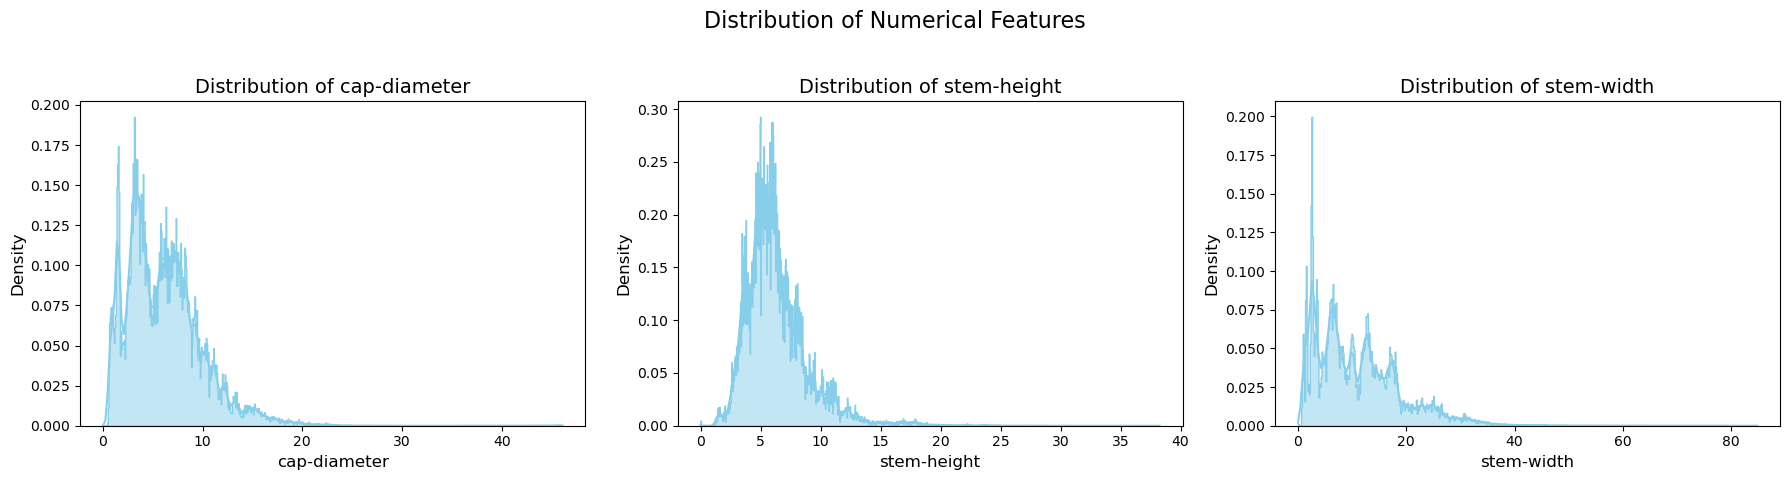

In [ ]:
def visualize_numerical_distributions(df):

    # Set up the figure for multiple subplots
    num_columns = 3  # Number of columns for the subplot grid
    num_rows = (len(num_cols) + num_columns - 1) // num_columns  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()

# Call the function
visualize_numerical_distributions(mushroom)


### Distribution of Target Feature

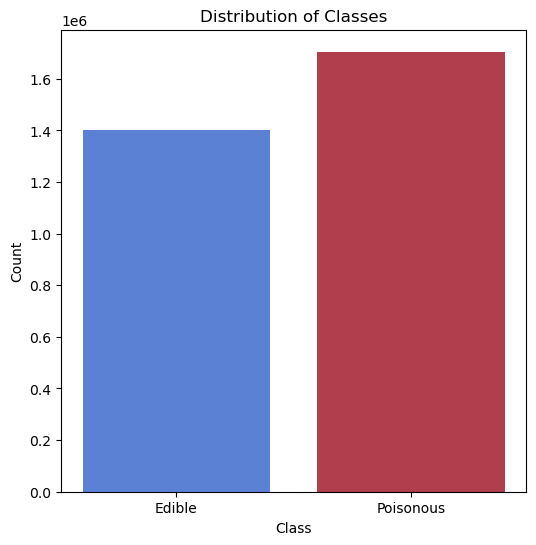

In [ ]:
# Calculate counts for the bar chart
class_counts = mushroom['class'].value_counts().sort_index()
labels = ["Edible", "Poisonous"]

# Create bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, class_counts, color=custom_palette)

# Add title and labels
plt.title('Distribution of Classes')
plt.ylabel('Count')
plt.xlabel('Class')

# Display the plot
plt.show()


# 4. Machine Learning

## Features Importance Test

### XGBoost Feature Selection

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target (y)
X = mushroom.drop(columns=['class'])  # Drop the target variable
y = mushroom['class'].apply(lambda x: 1 if x == 'p' else 0)  # Encode target variable

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Assuming you have some numerical features

# Preprocessing: one-hot encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical columns
    ])

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,        # Number of trees
    max_depth=6,             # Maximum depth of trees
    learning_rate=0.05,      # Learning rate
    min_child_weight=2,      # Minimum sum of instance weight needed in a child
    objective='binary:logistic',
    n_jobs=-1,               # Use all available cores for computation
    random_state=7           # Ensure reproducibility
)

# Create a pipeline that includes the preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,  # Stratified sampling for balanced training sets
    random_state=7
)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

# Feature importance
importances = xgb_clf.feature_importances_

# Get feature names after one-hot encoding and include numerical features
num_feature_names = numerical_cols  # Numerical features remain unchanged
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine both numerical and categorical feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)


Model Accuracy: 0.9807
Feature Importances:
                  Feature  Importance
102           ring-type_z    0.038994
5             cap-shape_c    0.038674
59           gill-color_k    0.034921
19          cap-surface_l    0.030979
51         gill-spacing_c    0.028289
..                    ...         ...
43      gill-attachment_c    0.000000
79           stem-color_f    0.000000
76     stem-color_Unknown    0.000000
50   gill-spacing_Unknown    0.000000
67   stem-surface_Unknown    0.000000

[116 rows x 2 columns]


In [ ]:
# Create a mapping for aggregated importances
one_hot_mapping = {
    'cap-shape': ['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
                  'cap-shape_s', 'cap-shape_x', 'cap-shape_Unknown'],
    'cap-surface': ['cap-surface_d', 'cap-surface_e', 'cap-surface_f', 'cap-surface_g',
                    'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l',
                    'cap-surface_n', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w',
                    'cap-surface_y', 'cap-surface_Unknown'],
    'cap-color': ['cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l',
                  'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u',
                  'cap-color_w', 'cap-color_y', 'cap-color_Unknown'],
    'does-bruise-or-bleed': ['does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'does-bruise-or-bleed_Unknown'],
    'gill-attachment': ['gill-attachment_a', 'gill-attachment_c', 'gill-attachment_d',
                        'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p',
                        'gill-attachment_s', 'gill-attachment_x', 'gill-attachment_Unknown'],
    'gill-spacing': ['gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-spacing_Unknown'],
    'gill-color': ['gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g',
                   'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
                   'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'gill-color_Unknown'],
    'stem-surface': ['stem-surface_f', 'stem-surface_g', 'stem-surface_h', 'stem-surface_i',
                     'stem-surface_k', 'stem-surface_s', 'stem-surface_t', 'stem-surface_y', 'stem-surface_Unknown'],
    'stem-color': ['stem-color_b', 'stem-color_e', 'stem-color_f', 'stem-color_g',
                   'stem-color_k', 'stem-color_l', 'stem-color_n', 'stem-color_o',
                   'stem-color_p', 'stem-color_r', 'stem-color_u', 'stem-color_w',
                   'stem-color_y', 'stem-color_Unknown'],
    'has-ring': ['has-ring_f', 'has-ring_t', 'has-ring_Unknown'],
    'ring-type': ['ring-type_e', 'ring-type_f', 'ring-type_g', 'ring-type_l', 'ring-type_m',
                  'ring-type_p', 'ring-type_r', 'ring-type_t', 'ring-type_z', 'ring-type_Unknown'],
    'habitat': ['habitat_d', 'habitat_g', 'habitat_h', 'habitat_l', 'habitat_m',
                'habitat_p', 'habitat_u', 'habitat_w', 'habitat_Unknown'],
    'season': ['season_a', 'season_s', 'season_u', 'season_w']
}

# Create a DataFrame to aggregate importances
aggregated_importances = pd.DataFrame(columns=['Feature', 'Importance'])

# Loop through the mapping and aggregate importances
for original_feature, one_hot_columns in one_hot_mapping.items():
    # Sum the importances of one-hot encoded columns
    total_importance = feature_importance_df[feature_importance_df['Feature'].isin(one_hot_columns)]['Importance'].sum()

    # Create a DataFrame for the current row
    row = pd.DataFrame({'Feature': [original_feature], 'Importance': [total_importance]})

    # Concatenate the row to aggregated_importances
    aggregated_importances = pd.concat([aggregated_importances, row], ignore_index=True)

# Include original features that are not one-hot encoded
remaining_features = feature_importance_df[~feature_importance_df['Feature'].isin(sum(one_hot_mapping.values(), []))]
aggregated_importances = pd.concat([aggregated_importances, remaining_features], ignore_index=True)

# Sort the final aggregated importances
aggregated_importances = aggregated_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the aggregated importances
print("Aggregated Feature Importances:")
print(aggregated_importances)

Aggregated Feature Importances:
                 Feature  Importance
0            cap-surface    0.159996
1             gill-color    0.121655
2              cap-color    0.110475
3              ring-type    0.093213
4             stem-color    0.092926
5        gill-attachment    0.079565
6           stem-surface    0.072354
7              cap-shape    0.068017
8                habitat    0.061186
9           gill-spacing    0.056536
10  does-bruise-or-bleed    0.027864
11              has-ring    0.024315
12            stem-width    0.010324
13                season    0.008663
14           stem-height    0.008282
15          cap-diameter    0.004630


C:\Users\hojun\AppData\Local\Temp\ipykernel_15804\199696900.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_importances = pd.concat([aggregated_importances, row], ignore_index=True)


C:\Users\hojun\AppData\Local\Temp\ipykernel_15804\2691466845.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=aggregated_importances, palette='viridis', ax=ax1)


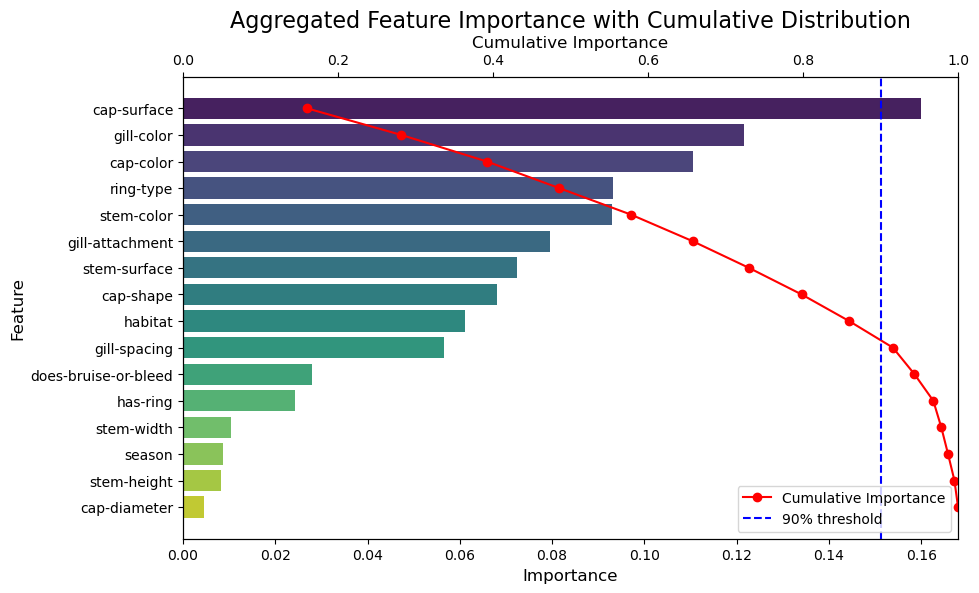

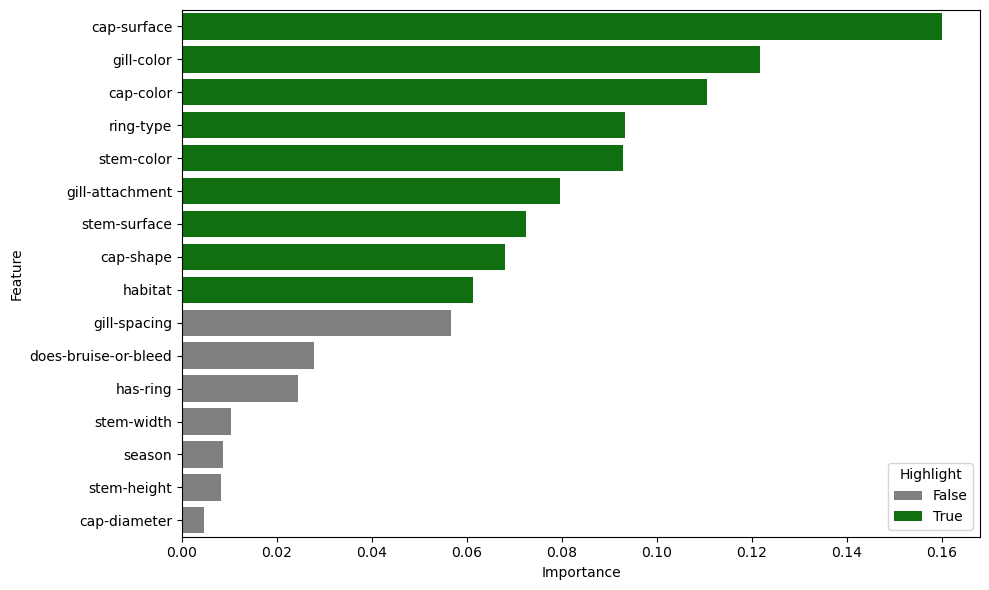

In [ ]:
# Sort by importance in descending order
aggregated_importances = aggregated_importances.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
aggregated_importances['Cumulative_Importance'] = aggregated_importances['Importance'].cumsum()

# Plotting the bar plot of feature importances
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for feature importances
sns.barplot(x='Importance', y='Feature', data=aggregated_importances, palette='viridis', ax=ax1)

# Add title and labels
ax1.set_title('Aggregated Feature Importance with Cumulative Distribution', fontsize=16)
ax1.set_xlabel('Importance', fontsize=12)
ax1.set_ylabel('Feature', fontsize=12)

# Create another axis for the cumulative importance plot
ax2 = ax1.twiny()

# Plot cumulative importance
ax2.plot(aggregated_importances['Cumulative_Importance'], aggregated_importances['Feature'], color='red', marker='o', label='Cumulative Importance')

# Add threshold for 90% (can be adjusted)
threshold = 0.90
ax2.axvline(threshold, color='blue', linestyle='--', label='90% threshold')

# Highlight features that are within the 80% cumulative importance
aggregated_importances['Highlight'] = aggregated_importances['Cumulative_Importance'] <= threshold

# Create the plot
plt.figure(figsize=(10, 6))

# Use 'Highlight' as the hue to differentiate colors
sns.barplot(x='Importance', y='Feature', data=aggregated_importances, hue='Highlight', dodge=False, palette={True: 'green', False: 'gray'})

# Set x-axis limits and labels for the cumulative importance
ax2.set_xlim([0, 1])
ax2.set_xlabel('Cumulative Importance', fontsize=12)

# Show legend
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
# Take only necessary variables as derived above from features importance test

mushroom = mushroom[['cap-surface', 'gill-color', 'cap-color', 'ring-type', 'stem-color', 'gill-attachment', 'stem-surface', 'habitat', 'gill-spacing','class']]

# 5. Execution of Models

### Please note that the following codes are run on a subset of the dataset as the full dataset contains a large number of rows, leading to significantly longer execution times. This approach is intended to compile the output from all our models into a single report and display the codes functionality. For our presentation on findings, each group member ran their models individually using the complete dataset, hence, MCC, Accuracy and AUC values generated in each of the models below on data subset will differ from the presentation slides (that use the full data).

In [ ]:
# Take a subset of 10,000 random samples, do not execute this cell if intend to run on full dataset

mushroom = mushroom.sample(n=10000, random_state=7)


## Naive Bayes Model

In [ ]:
# Prepare features and target
X = mushroom.drop(columns=['class'])
y = mushroom['class'].apply(lambda x: 1 if x == 'e' else 0)

# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and GaussianNB
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Split the data into training (30%) and testing (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=7)

# Parameter tuning on the training set
param_grid = {
    'classifier__var_smoothing': [1e-8, 1e-6, 1e-4, 1e-2],
    'classifier__priors': [None, [0.5, 0.5], [0.3, 0.7]]
}

# Grid search for best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score on training set: ", grid_search.best_score_)

# Evaluate on the single train-test split
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute metrics
mcc = matthews_corrcoef(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)
accuracy = accuracy_score(y_test, y_test_pred)

# Display results
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}\n')

print(f'MCC on test set: {mcc:.4f}')
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'AUC on test set: {auc:.4f}')

Best parameters found:  {'classifier__priors': None, 'classifier__var_smoothing': 0.01}
Best cross-validation score on training set:  0.69
Confusion Matrix:
[[1958 1925]
 [ 344 2773]]

MCC on test set: 0.4167
Accuracy on test set: 0.6759
AUC on test set: 0.7980


## Logistic Regression Model

In [ ]:
# Prepare features and target
X = mushroom.drop(columns=['class'])
y = mushroom['class'].apply(lambda x: 1 if x == 'e' else 0)

# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing: scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Create a pipeline that includes preprocessing and SMOTE
pipeline = ImbalancedPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=7)),
    ('classifier', logistic_model)
])

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Define hyperparameter grid for tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],               # Regularization types
    'classifier__solver': ['liblinear'],                # Solver
    'classifier__max_iter': [200, 400, 600, 800]      # Maximum iterations
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score on training set: ", grid_search.best_score_)

# Final model with the best parameters
final_model = grid_search.best_estimator_

# Predict on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute metrics for the test set
mcc = matthews_corrcoef(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}\n')

print(f'MCC on test set: {mcc:.4f}')
print(f'Accuracy on test set: {accuracy:.4f}')
print(f'AUC on test set: {auc:.4f}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found:  {'classifier__C': 10, 'classifier__max_iter': 200, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validation score on training set:  0.8064285714285713
Confusion Matrix:
[[1281  381]
 [ 238 1100]]

MCC on test set: 0.5895
Accuracy on test set: 0.7937
AUC on test set: 0.8552


## KNN Model

In [ ]:
# Separate features (X) and target (y)
X = mushroom.drop(columns=['class'])  # Drop the target column 'y'
y = mushroom['class'].apply(lambda x: 1 if x == 'p' else 0)  # Convert target to binary (1 for 'p', 0 for 'e')

# Get categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3) Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical columns
    ])

# Define the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Create a pipeline to include preprocessing and classifier
pipeline = ImbalancedPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing (scaling and encoding)
    ('classifier', knn)  # KNN classifier
])

# Split the data into training (90%) and testing (10%) sets for hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7, stratify=y)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_neighbors': np.arange(1, 10),  # Vary the number of neighbors between 1 and 30
    'classifier__weights': ['uniform', 'distance'],  # Test both uniform and distance-based weighting
    'classifier__metric': ['euclidean', 'manhattan'],  # Try different distance metrics
    'classifier__p': [1, 2]  # Minkowski distance with p=1 (Manhattan) and p=2 (Euclidean)
}

# Perform GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_knn = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
# Best hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}

# Test the model on the fold test set
y_pred = best_knn.predict(X_test)

# Confusion matrix for this fold
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{cm}', "\n")

# Compute MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc:.4f}')

# Compute accuracy for this fold
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for this fold: {accuracy:.4f}')

# AUC Score
y_prob = best_knn.predict_proba(X_test)[:, 1]  # Get the probability estimates for the positive class
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score:.4f}')

Best hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance'}
Confusion matrix:
[[1317   35]
 [  54 1594]] 

MCC: 0.9402
Accuracy for this fold: 0.9703
AUC Score: 0.9874


## XGBoost Model

In [ ]:
# Prepare features and target
X = mushroom.drop(columns = ['class'])
y = mushroom['class'].apply(lambda x:1 if x == 'p' else 0)    # 1 if poisonous, otherwise 0

# categorical columns are under reduced_cat_cols
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols)
    ])

# XGB classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=7)    # Remember not to set num_class when using binary objectives

# Create pipeline for preprocessing and classifier
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

# Split training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Fit into pipeline
pipeline.fit(X_train, y_train)

# Create an MCC scorer for the GridSearch
mcc_scorer = make_scorer(matthews_corrcoef)

# Updated parameter grid to reference the classifier within the pipeline
param_grid = {
    'classifier__max_depth': [1, 2, 3],
    'classifier__min_child_weight': [2, 5, 10],
    'classifier__n_estimators': [50, 100, 200, 500, 700],  # Number of weak classifiers
    'classifier__learning_rate': [0.01, 0.1, 1, 10, 15],  # Learning rate
}

# Now use the pipeline in RandomizedSearchCV
# 5 folds
random_search = RandomizedSearchCV(
    pipeline,  # Use the pipeline with xgb_clf here
    param_distributions=param_grid,  # Updated grid
    n_iter=100,  # Number of random configurations to try
    cv=3,
    scoring=mcc_scorer,
    random_state=7,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the model with the pipeline
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation MCC score:", random_search.best_score_)

# Extract the best parameters from random_search
best_params = random_search.best_params_

# Create an XGBoost classifier with the best parameters
best_xgb_clf = xgb.XGBClassifier(
    max_depth=best_params['classifier__max_depth'],
    min_child_weight=best_params['classifier__min_child_weight'],
    n_estimators=best_params['classifier__n_estimators'],
    learning_rate=best_params['classifier__learning_rate'],
    objective="binary:logistic",  # Binary classification
    random_state=7
)

# Create pipeline for preprocessing and classifier
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', best_xgb_clf)
])

# Fit pipteline with training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}\n')

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
# Calculate MCC
mcc1 = matthews_corrcoef(y_test, y_pred)

print(f'MCC on test set: {mcc1}')
print("Accuracy with Best Parameters:", accuracy)

# Calculate AUC score
auc_value = roc_auc_score(y_test, y_pred)

# Print AUC score
print(f"AUC Score: {auc_value:.4f}")


Best parameters: {'classifier__n_estimators': 700, 'classifier__min_child_weight': 2, 'classifier__max_depth': 2, 'classifier__learning_rate': 1}
Best cross-validation MCC score: 0.9299270345832754
Confusion Matrix:
[[1287   51]
 [  27 1635]]

MCC on test set: 0.9474187557472671
Accuracy with Best Parameters: 0.974
AUC Score: 0.9728


## Decision Tree

In [ ]:
# Prepare features and target
X = mushroom.drop(columns=['class'])
y = mushroom['class'].apply(lambda x: 1 if x == 'p' else 0)

# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# Preprocessing: scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical columns
    ])

clf = tree.DecisionTreeClassifier()

#straified sampling for hyper parameter tuning

# Create a pipeline
pipeline = ImbalancedPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

X_sample, _ , y_sample, _ = train_test_split(
        X,
        y,
        test_size = 0.30,
        stratify = y, # Stratified sampling for the train set to have equal subgroups
        random_state = 7)

XS_train, XS_test, yS_train, yS_test = train_test_split(
        X_sample,
        y_sample,
        test_size = 0.30,
        stratify = y_sample, # Stratified sampling for the train set to have equal subgroups
        random_state = 7)

pipeline.fit(XS_train, yS_train)

# Define a parameter grid for hyperparameter tuning
# Define your parameter grid for RandomizedSearchCV

param_grid = {
    'classifier__criterion': ['gini','entropy'],
    'classifier__max_depth': [None,5,10,15,20]
}

# Now use the pipeline in RandomizedSearchCV
Grid_search = GridSearchCV(
    pipeline,  # Use the pipeline here
    param_grid=param_grid,  # Updated grid
    cv=5,
    n_jobs=-1  # Use all available cores
)

# Fit the model with the pipeline
Grid_search.fit(XS_train, yS_train)

# Get the best parameters
best_params = Grid_search.best_params_
print("Best Parameters:", best_params)

# Create a SVM classifier with the best parameters
best_clf = tree.DecisionTreeClassifier(
    criterion=best_params['classifier__criterion'],
    max_depth=best_params['classifier__max_depth'],
    random_state=7
)

pipeline.set_params(classifier=best_clf)

X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = 0.30,
        stratify = y, # Stratified sampling for the train set to have equal subgroups
        random_state = 7)
pipeline.fit(X_train, y_train)


# Train the pipeline, which will handle preprocessing, SMOTE, and fitting the model
pipeline.fit(X_train, y_train)

# Test the model on the unmodified test set
y_pred = pipeline.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}\n')

# Compute MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC : {mcc:.4f}')

# Compute Accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy  : {acc:.4f}')

#AUC
#calculate predicted probabilities
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

#Compute AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC : {auc:.4f}')


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None}
Confusion Matrix:
[[1298   54]
 [  46 1602]]

MCC : 0.9327
Accuracy  : 0.9667
AUC : 0.9720


## Random Forest

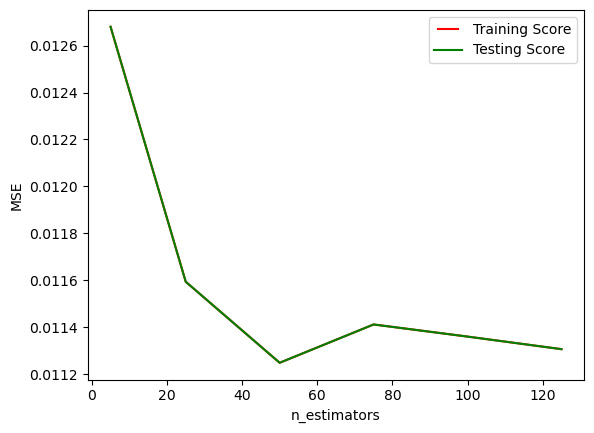

MCC: 0.9508
Accuracy: 0.9757
AUC : 0.9917


In [ ]:
# Encoding for target classes
mushroom_rf = mushroom.copy()
mushroom_rf['class'] = mushroom_rf['class'].map({'e': 0, 'p': 1})

# Perform one-hot encoding on all the other categorical columns
mushroom_encoded = pd.get_dummies(mushroom_rf.drop('class', axis=1))

### Separate "features" and class column from training dataset
mushroom_features = mushroom_encoded
mushroom_label = mushroom_rf['class']
#class is the binary target which is either edible "e" or poisonous "p"

###splitting 70/30 for test and training sets (test size = 0.30) stratify according to train_label
train_features, test_features, train_labels, test_labels = train_test_split(
        mushroom_features,
        mushroom_label,
        test_size = 0.30,
        stratify = mushroom_label, # Stratified sampling
        random_state = 7)

train_results = []
test_results = []
list_nb_trees = [5, 25, 50, 75, 100, 125]

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(train_features, train_labels)

    train_results.append(mean_squared_error(train_labels, rf.predict(train_features)))
    test_results.append(mean_squared_error(train_labels, rf.predict(train_features)))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.rcParams.update({'font.size': 10})
plt.show()

### Use RandomForestClassifier (aim to do binary classification) and fixing random state to 7
rf = RandomForestClassifier (n_estimators=50, random_state=7, oob_score=True)

# Fitting the model using the training set
rf.fit(train_features, train_labels)

### Get the prediction score
test_score = rf.score(test_features, test_labels)

### Get the predicted labels
prediction = rf.predict(test_features)

# Evaluate the model on the test set using MCC
mcc_test = matthews_corrcoef(test_labels, prediction)
print(f'MCC: {mcc_test:.4f}')

# Evaluate the model on the test set using accuracy
accuracy = accuracy_score(test_labels, prediction)
print(f'Accuracy: {accuracy:.4f}')

# Evaluate the model on the test set using auc
auc = roc_auc_score(test_labels, rf.predict_proba(test_features)[:,1])
print(f'AUC : {auc:.4f}')


[[1309   43]
 [  30 1618]]


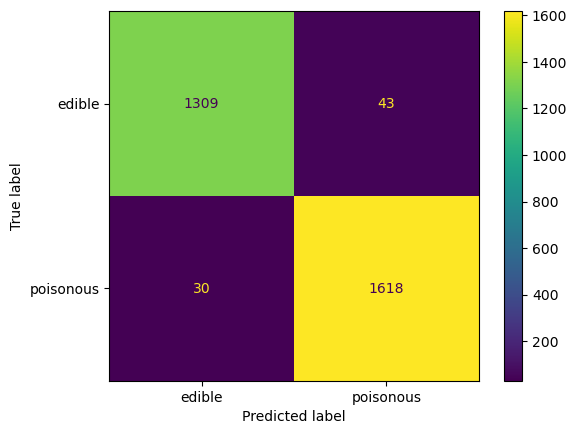

In [ ]:
# Confusion Matrix for Best Model (Random Forest)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, prediction)
print(conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['edible','poisonous'])
disp.plot()